In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import matplotlib.pyplot as plt

tf.enable_eager_execution()
tfe = tf.contrib.eager

/home/vibloteam/tensorflow_tutorial/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vibloteam/tensorflow_tutorial/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vibloteam/tensorflow_tutorial/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vibloteam/tensorflow_tutorial/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
tf.executing_eagerly() 

True

In [3]:
import numpy as np

X_data = np.random.random((10000, 2))

# Fake sample weights
sample_weights = np.array([[3, 4]])

# Fake y_data
y_data = np.matmul(X_data, sample_weights.transpose())

In [4]:
y_data = np.add(y_data, np.random.uniform(-0.5, 0.5))

In [5]:
y_data.shape

(10000, 1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

/home/vibloteam/tensorflow_tutorial/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [19]:
# Parameters
learning_rate = 0.0025
display_step = 500
num_steps = 20000

In [20]:
# Weight and Bias
W = tfe.Variable([[1.0, 1.0]])
b = tfe.Variable(np.random.uniform(-0.5, 0.5))

In [21]:
# Linear regression (Wx + b)
def linear_regression(inputs):
    return tf.matmul(inputs, W, transpose_b=True) + b

# Mean square error
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_mean(tf.square(model_fn(inputs) - labels))

In [22]:
# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)

In [23]:
# Training
for step in range(num_steps):
    optimizer.apply_gradients(grad(linear_regression, np.float32(X_train), y_train))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), 
              "train cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, np.float32(X_train), y_train)),
              "test cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, np.float32(X_test), y_test)),
              "W=", W.numpy(), "b=", b.numpy())

Epoch: 0001 train cost= 7.283759594 test cost= 7.017067432 W= [[1.0071368 1.0075816]] b= 0.17897414
Epoch: 0500 train cost= 0.359400332 test cost= 0.362268418 W= [[1.9841096 2.1830502]] b= 1.6125189
Epoch: 1000 train cost= 0.269019544 test cost= 0.274020880 W= [[2.098084  2.4568245]] b= 1.4611386
Epoch: 1500 train cost= 0.203500465 test cost= 0.207753628 W= [[2.187382 2.67465 ]] b= 1.2988287
Epoch: 2000 train cost= 0.154195309 test cost= 0.157723308 W= [[2.2696612 2.8602393]] b= 1.1562748
Epoch: 2500 train cost= 0.117006972 test cost= 0.119900264 W= [[2.3452842 3.0188355]] b= 1.0316079
Epoch: 3000 train cost= 0.088901050 test cost= 0.091252476 W= [[2.4144044 3.1545405]] b= 0.9225869
Epoch: 3500 train cost= 0.067621648 test cost= 0.069518633 W= [[2.4772787 3.2707975]] b= 0.8272423
Epoch: 4000 train cost= 0.051485442 test cost= 0.053006448 W= [[2.5342357 3.3705113]] b= 0.7438535
Epoch: 4500 train cost= 0.039232813 test cost= 0.040446028 W= [[2.5856497 3.456129 ]] b= 0.6709175
Epoch: 5000

In [25]:
y_pred = linear_regression(np.float32(X_test))

In [26]:
y_pred

<tf.Tensor: id=1262498, shape=(2000, 1), dtype=float32, numpy=
array([[0.9013741],
       [4.9975348],
       [4.6948195],
       ...,
       [3.2196229],
       [3.08029  ],
       [2.422932 ]], dtype=float32)>

In [27]:
y_test

array([[0.8946791 ],
       [5.00038971],
       [4.69610016],
       ...,
       [3.21725159],
       [3.07970747],
       [2.42054664]])

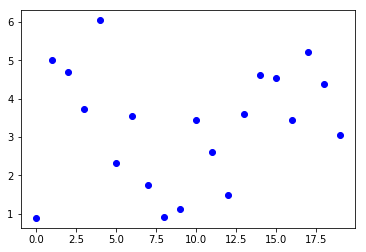

In [50]:
plt.plot(range(len(y_test[:20])), y_test[:20], 'bo')

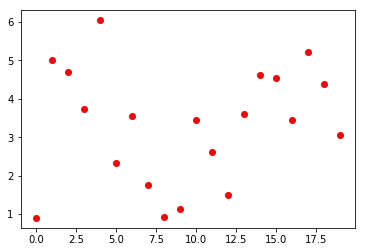

In [51]:
plt.plot(range(len(y_pred.numpy()[:20])), y_pred[:20], 'ro')